# Intensity Transformation on Images using Python

![bit_plane_slicing.png](attachment:bit_plane_slicing.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Topics Covered -

- Image Negatives
- Log Transformations
- Power Law Transformations
- Piecewise Linear Transformation Functions
- Bit Plane Slicing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True #This setting enables automatic layout adjustment for figures, potentially improving the appearance and readability of plots and images generated by matplotlib. It ensures that the plot elements are nicely fitted within the figure window, preventing overlapping or clipping


### - Image Negatives

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0304(a)(breast_digital_Xray).tif')

In [ ]:
def negative(r):
    s = 255 - r
    return s

Text(0, 0.5, 'Output Intensity Levels')

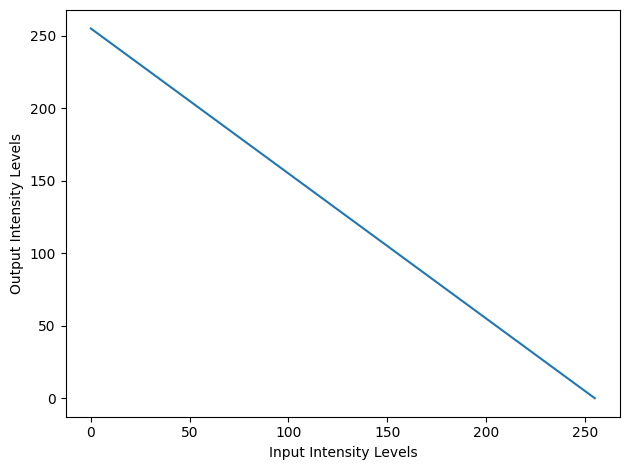

In [ ]:
x_values = np.linspace(0,255,500)
y_values = negative(x_values)

plt.plot(x_values, y_values)
plt.xlabel('Input Intensity Levels')
plt.ylabel('Output Intensity Levels')

In [ ]:
img_neg = negative(img)

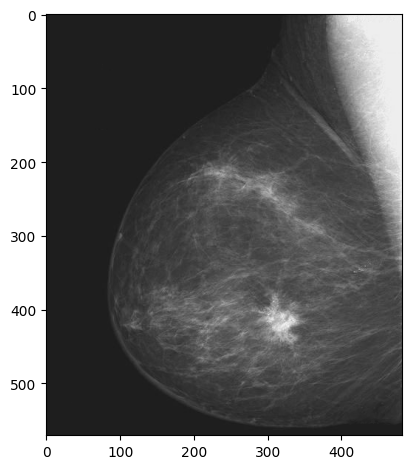

In [ ]:
plt.imshow(img)

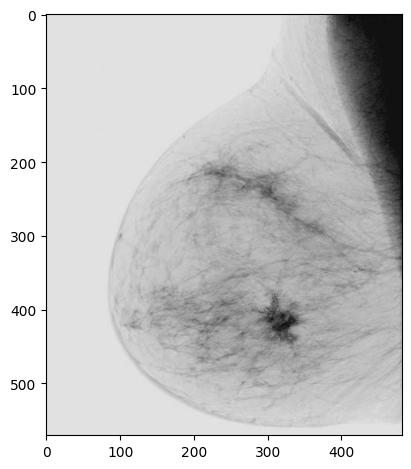

In [ ]:
plt.imshow(img_neg)

In [ ]:
def scale_image(input_img):
    input_img = input_img / np.max(input_img)
    input_img = (input_img*255).astype('int')
    return input_img


def plot_results(input_img, output_img, x_values, y_values, save_as):

    # plotting the graph
    plt.figure(figsize = (36,12))

    plt.subplot(131)
    plt.imshow(input_img)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixels')
    plt.ylabel('Output Pixels')
    plt.grid(True)

    plt.subplot(133)
    plt.imshow(output_img)
    plt.title('Transformed Image')
    plt.axis('off')

    plt.savefig(save_as + '.png')

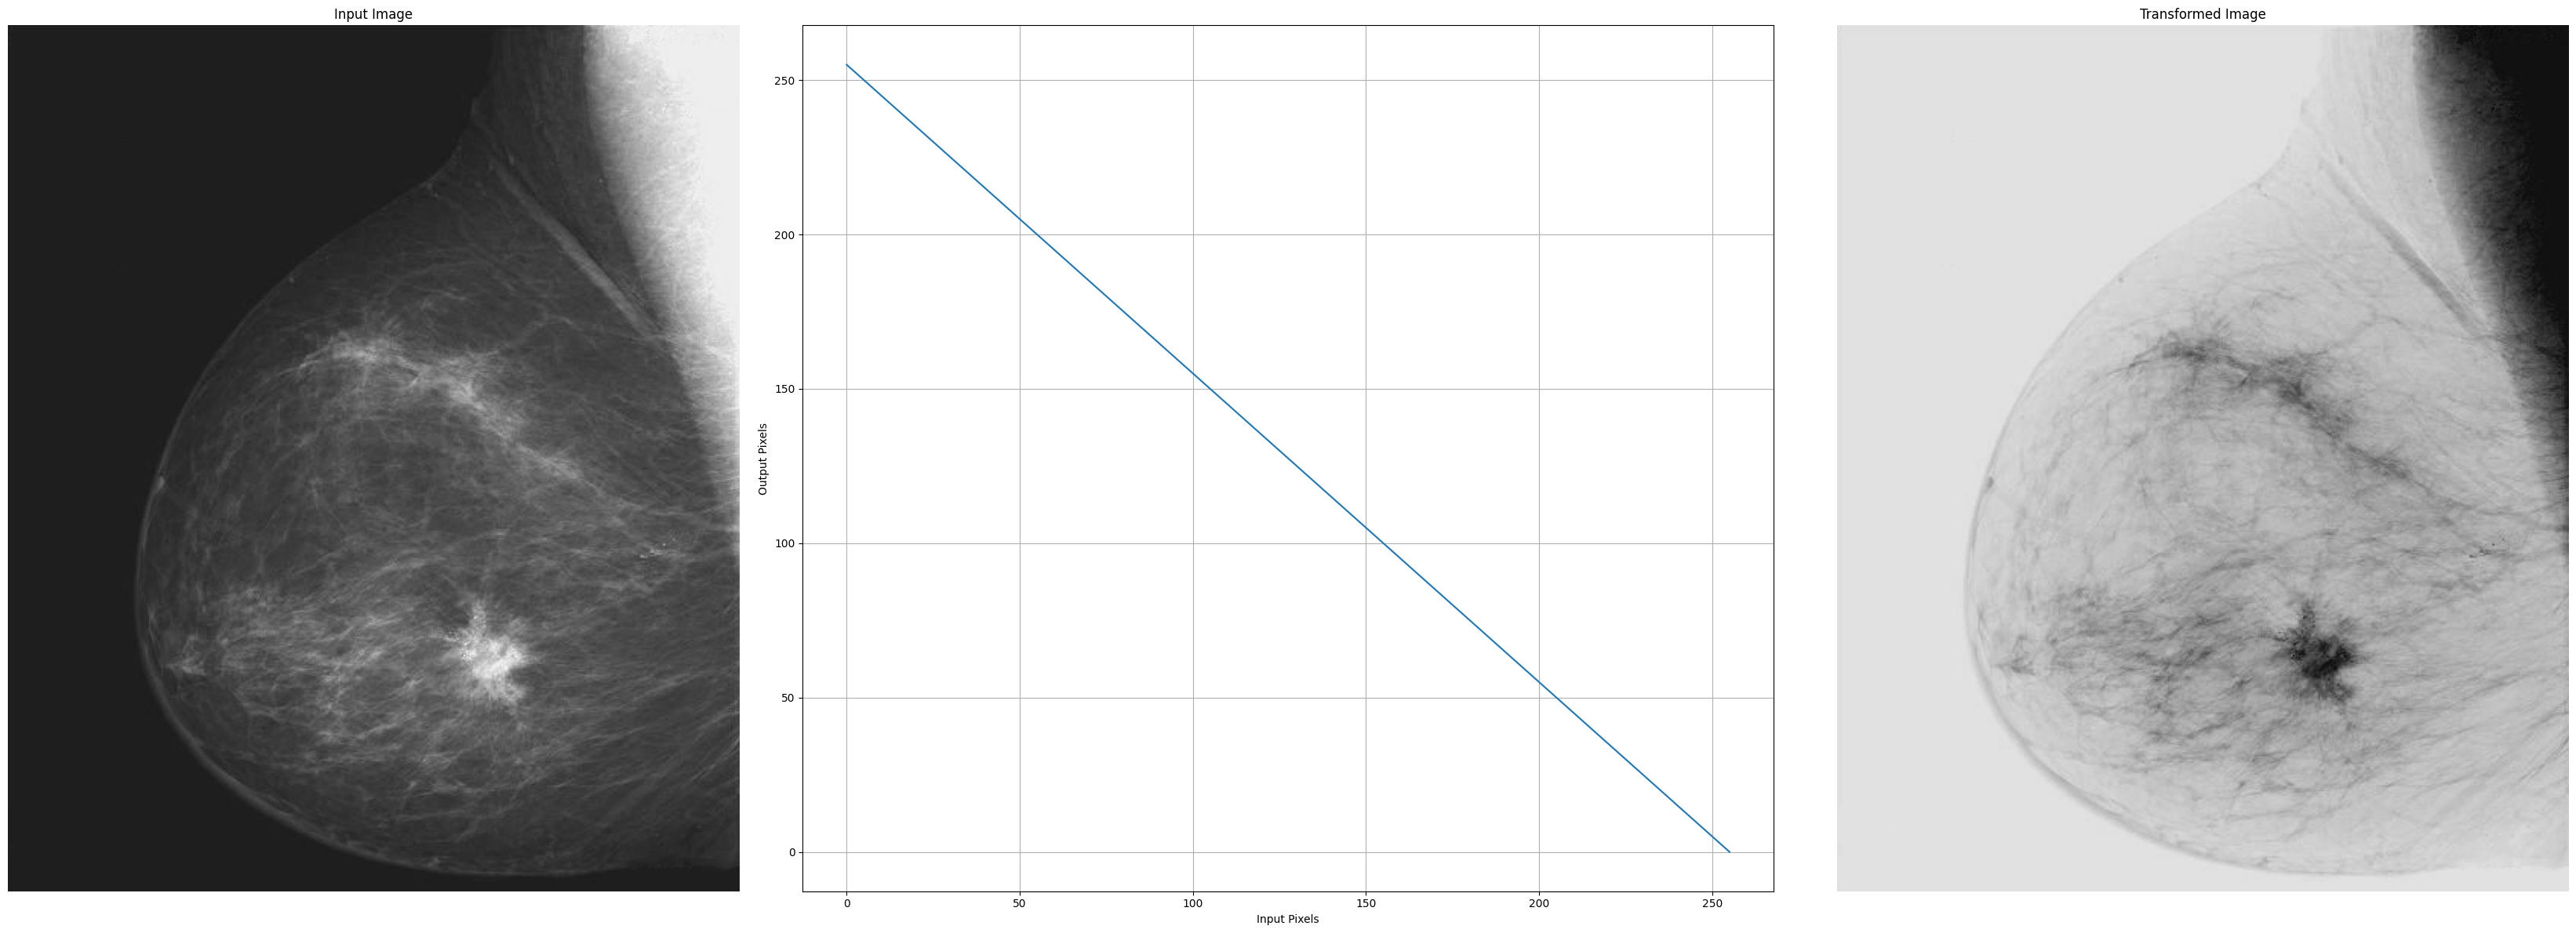

In [ ]:
plot_results(img, img_neg, x_values, y_values, 'negative')

### - Log Transformation

In [ ]:
im = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0305(a)(DFT_no_log).tif')

In [ ]:
def logTransform(r, c=1):
    s = c*np.log(1.0+r)
    return s

In [ ]:
img_log = logTransform(im)
img_log_scaled = scale_image(img_log)

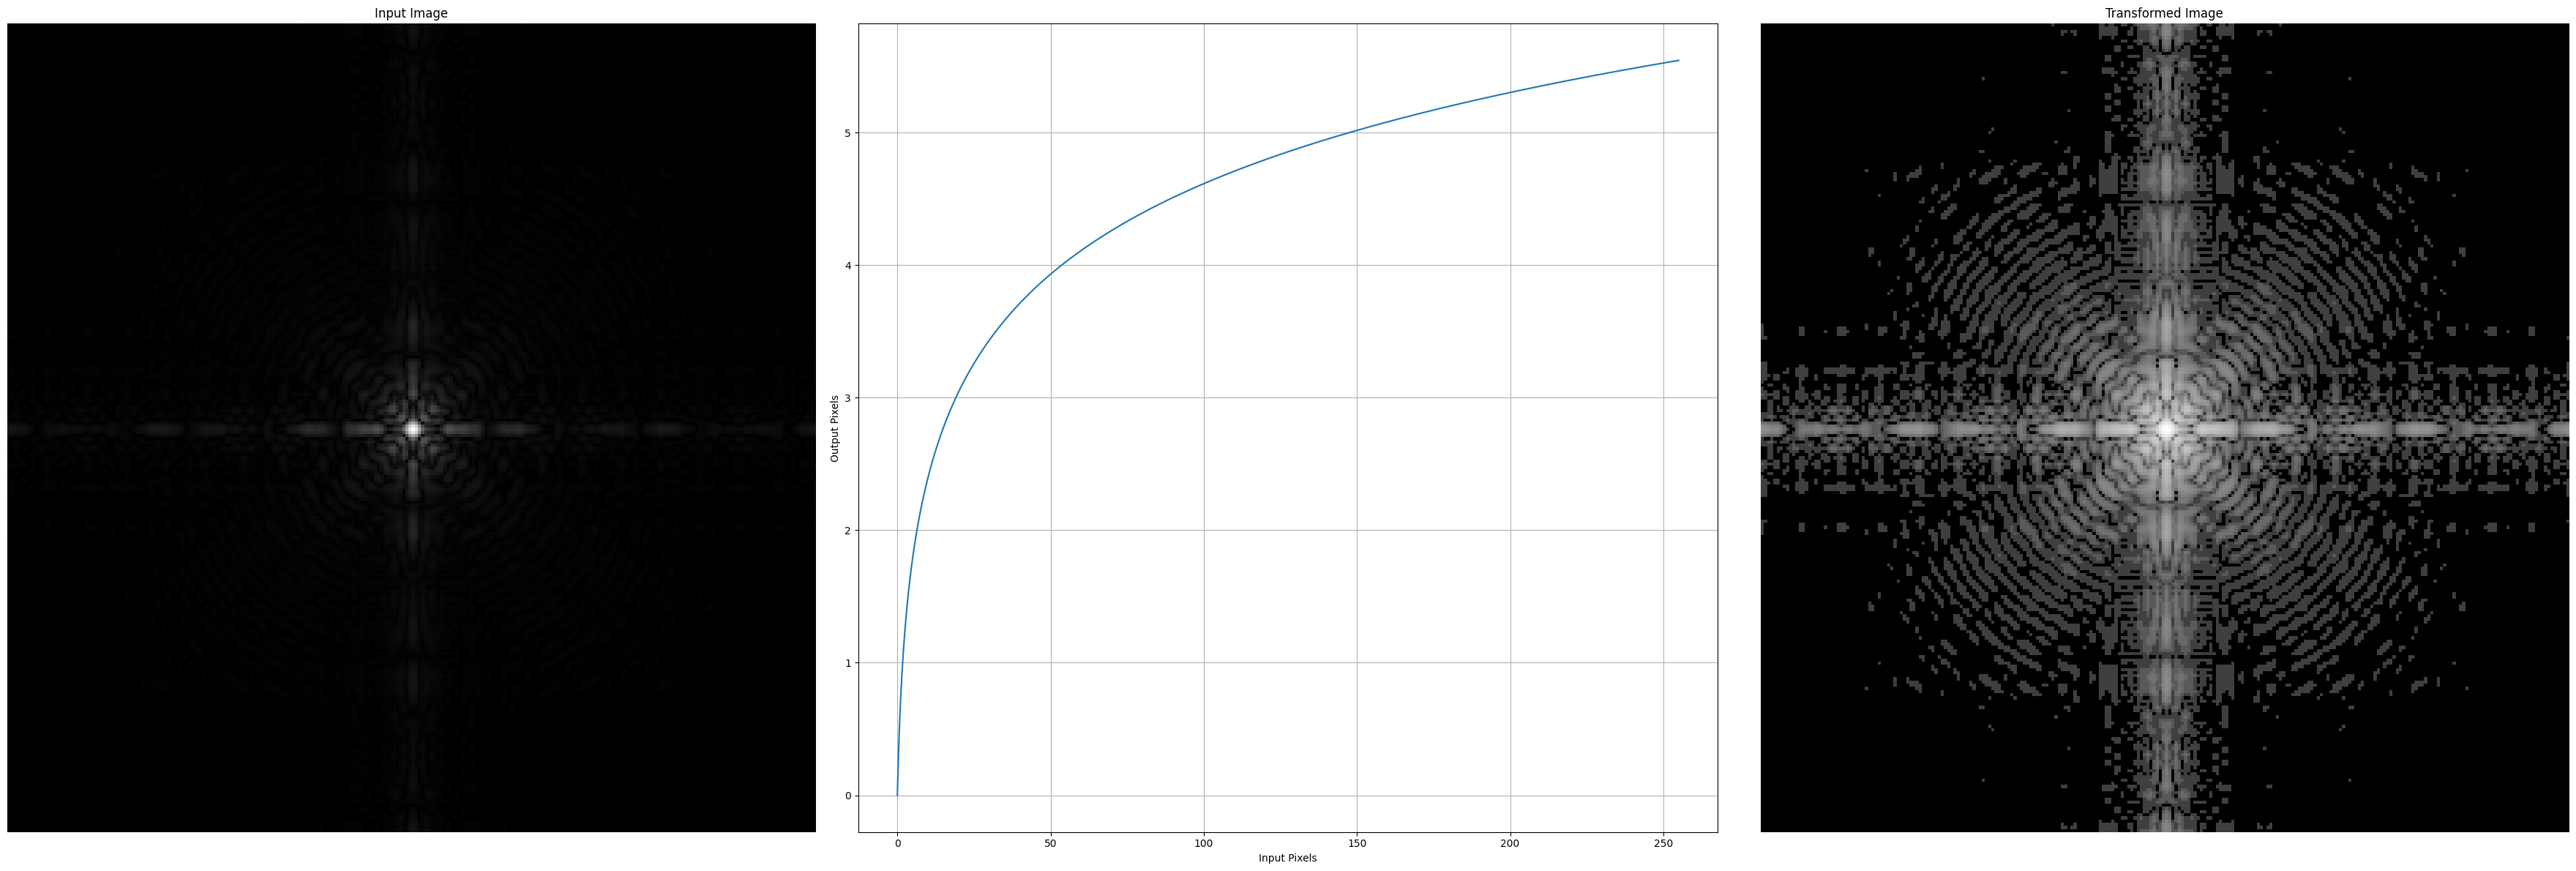

In [ ]:
# required for plotting
x_values = np.linspace(0,255,500)
y_values = logTransform(x_values)

plot_results(im, img_log_scaled, x_values, y_values, 'log')

### - Power Law (Gamma) Transformations

In [ ]:
spine_img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0308(a)(fractured_spine).tif')

(-0.5, 745.5, 975.5, -0.5)

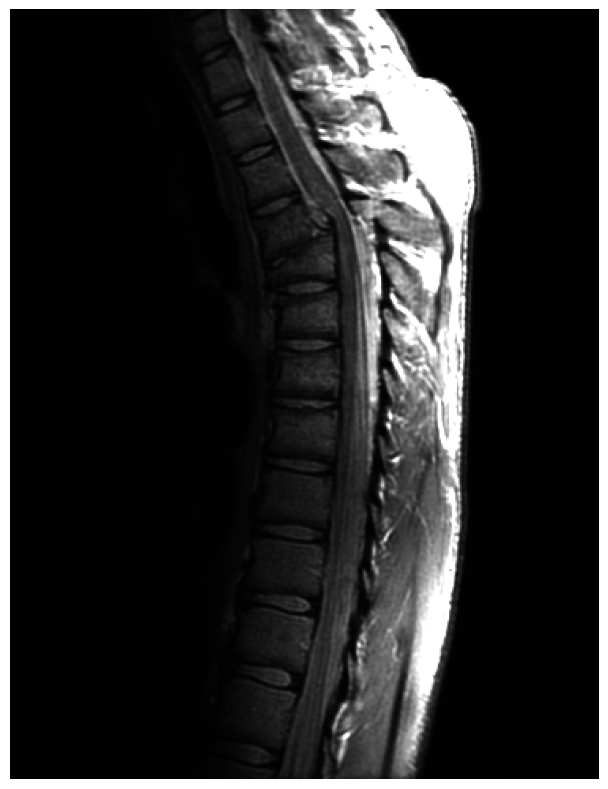

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(spine_img)
plt.axis('off')

In [ ]:
def gammaTransform(r, gamma, c=1):
    s = c* (r**gamma)
    return s

### Trying with gamma < 1

In [ ]:
img_gamma = gammaTransform(spine_img, 0.4)
img_gamma_scaled = scale_image(img_gamma)

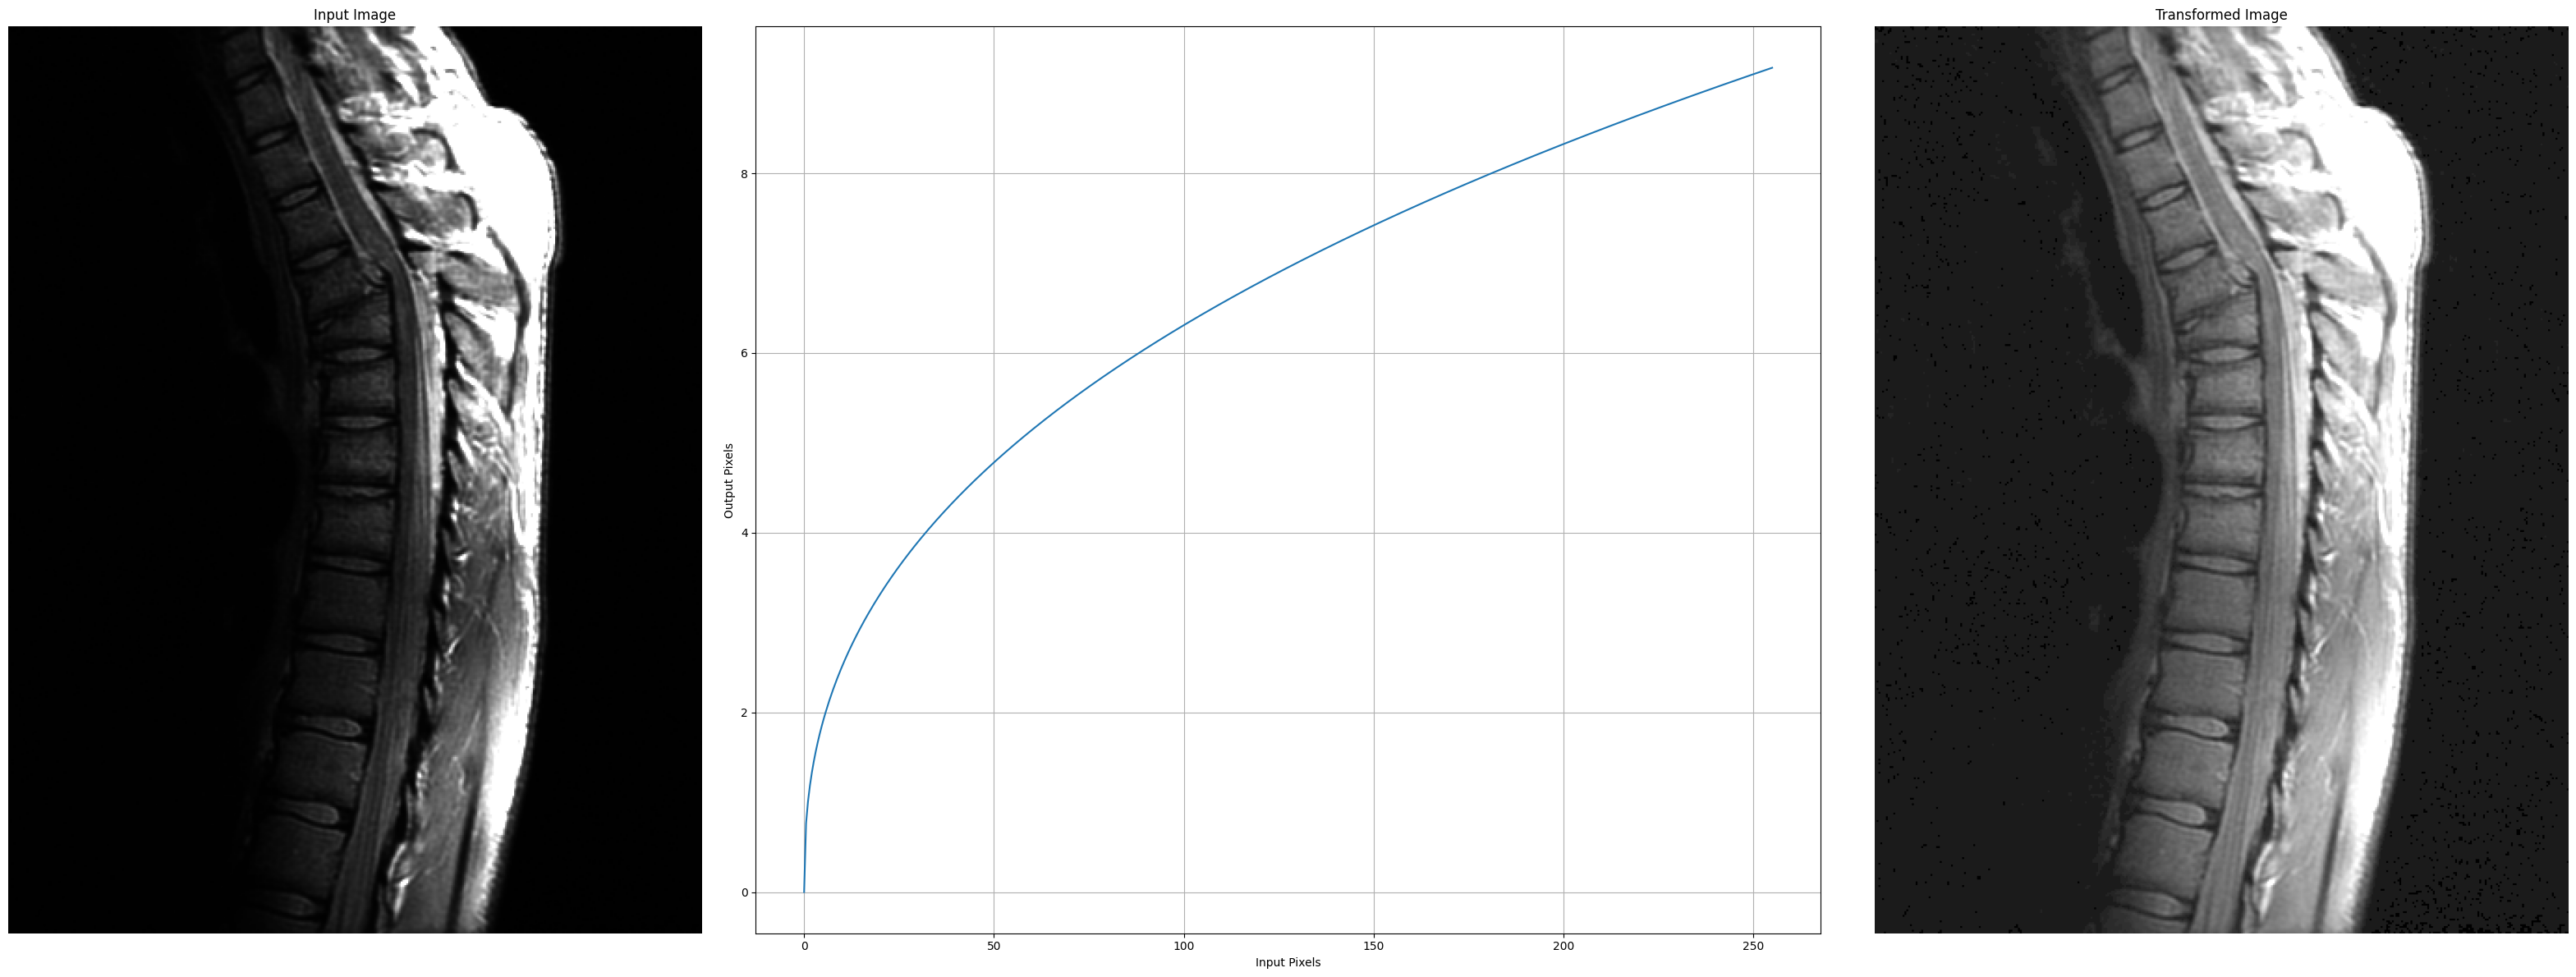

In [ ]:
# required for plotting
x_values = np.linspace(0,255,500)
y_values = gammaTransform(x_values, 0.4)

plot_results(spine_img, img_gamma_scaled, x_values, y_values, 'gamma_0_4')

In [ ]:
# defing a func to do gamma transform
def performGammaTransform(input_img, gammaValue):
        img_gamma = gammaTransform(input_img, gammaValue)
        img_gamma_scaled = scale_image(img_gamma)

        # required for plotting
        x_values = np.linspace(0,255,500)
        y_values = gammaTransform(x_values, gammaValue)

        plot_results(input_img,img_gamma_scaled, x_values, y_values,"gamma" + str(gammaValue))

        return img_gamma_scaled

In [ ]:
final_images = []

for gammaValue in [0.6, 0.4, 0.3]:
    final_images.append(performGammaTransform(spine_img, gammaValue))

Output hidden; open in https://colab.research.google.com to view.

### Comparing the outputs

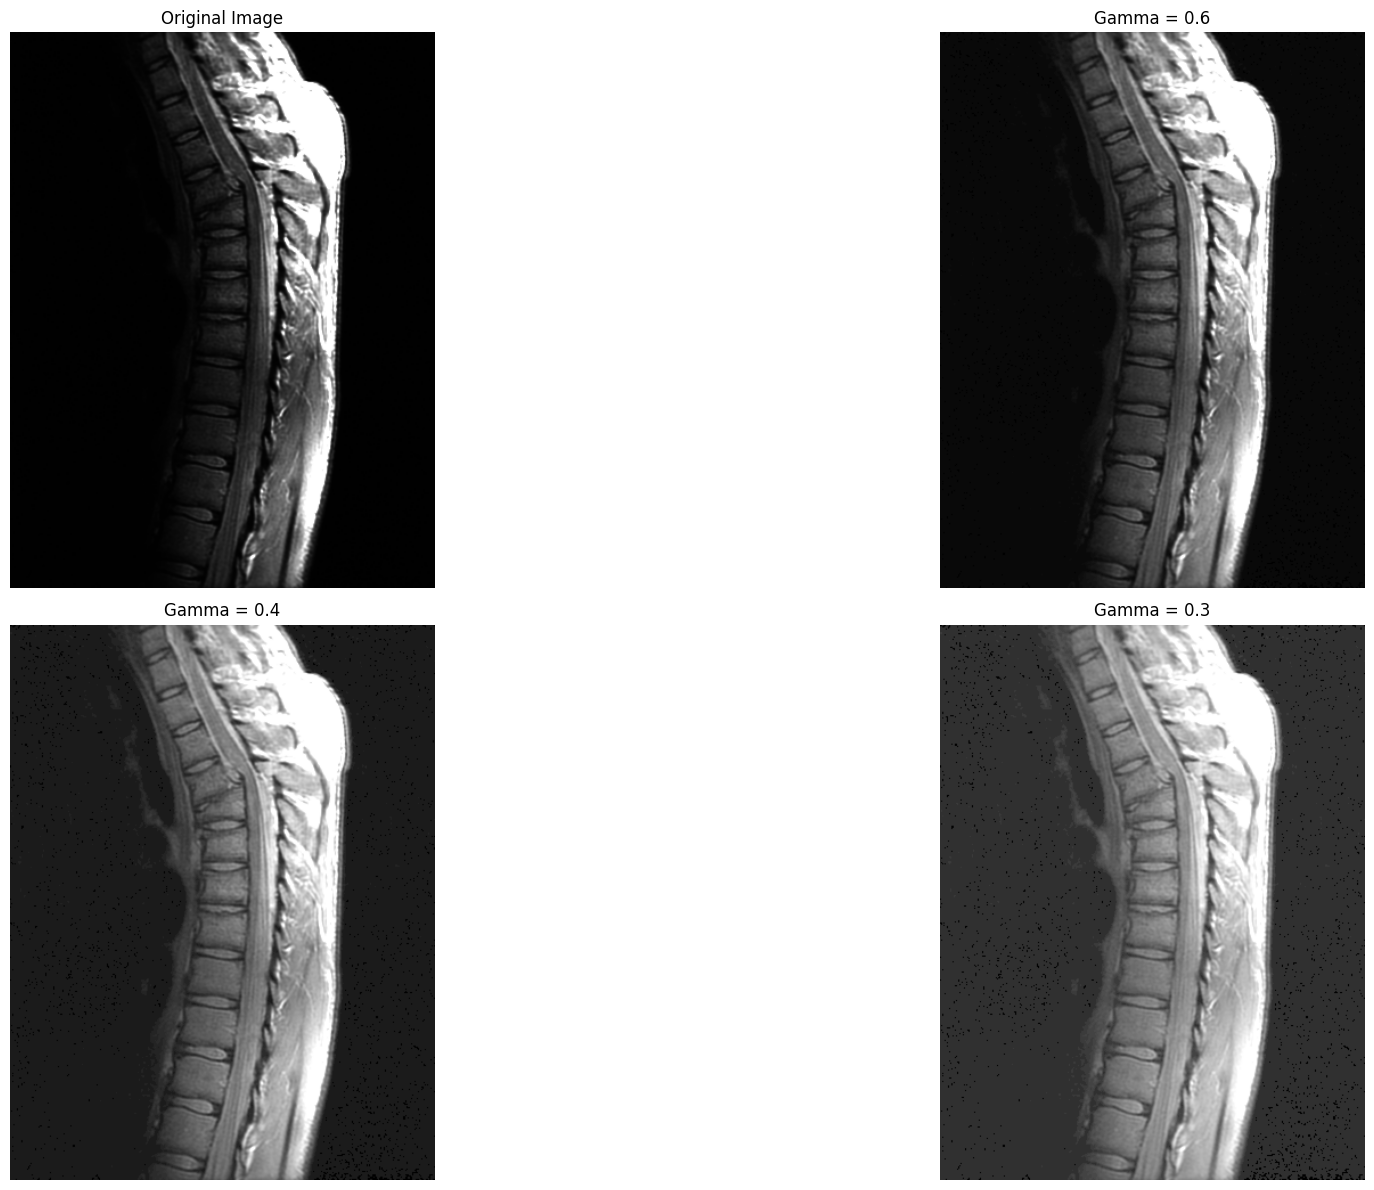

In [ ]:
plt.figure(figsize = (24,12))

plt.subplot(221)
plt.imshow(spine_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(final_images[0])
plt.title('Gamma = 0.6')
plt.axis('off')

plt.subplot(223)
plt.imshow(final_images[1])
plt.title("Gamma = 0.4")
plt.axis('off')

plt.subplot(224)
plt.imshow(final_images[2])
plt.title("Gamma = 0.3")
plt.axis('off')

plt.tight_layout()
plt.savefig('gamma.png')

### with gamma > 1

In [ ]:
arial_im = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0309(a)(washed_out_aerial_image).tif')

(-0.5, 764.5, 768.5, -0.5)

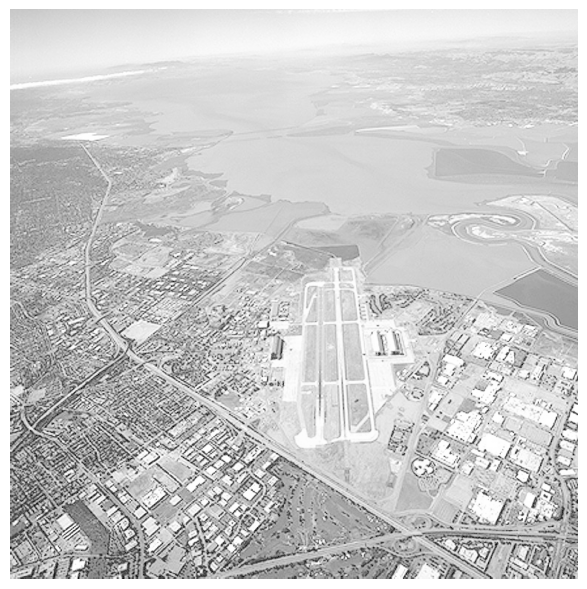

In [ ]:
plt.figure(figsize = (10,6))
plt.imshow(arial_im)
plt.axis('off')

In [ ]:
final_images_arial = []

for gammaValue in [3.0, 4.0, 5.0]:
    final_images_arial.append(performGammaTransform(arial_im, gammaValue))

Output hidden; open in https://colab.research.google.com to view.

### Comparing the outputs

In [ ]:
plt.figure(figsize = (24,12))

plt.subplot(221)
plt.imshow(arial_im)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(final_images_arial[0])
plt.title('Gamma = 3.0')
plt.axis('off')

plt.subplot(223)
plt.imshow(final_images_arial[1])
plt.title("Gamma = 4.0")
plt.axis('off')

plt.subplot(224)
plt.imshow(final_images_arial[2])
plt.title("Gamma = 5.0")
plt.axis('off')

plt.tight_layout()
plt.savefig('gamma_arial.png')

Output hidden; open in https://colab.research.google.com to view.

## - Contrast Stretching (piecewise linear transformatoin)

In [ ]:
im = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0310(b)(washed_out_pollen_image).tif')

(-0.5, 888.5, 888.5, -0.5)

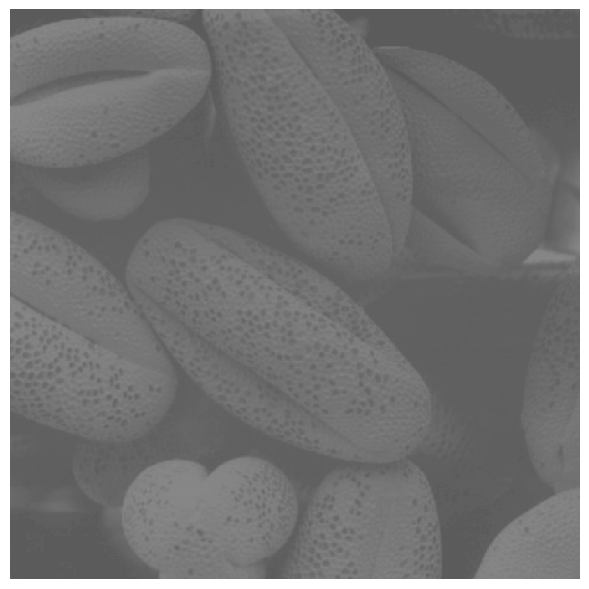

In [ ]:
plt.figure(figsize = (10,6))
plt.imshow(im)
plt.axis('off')

In [ ]:
def piecewiseLinear(r, r1, s1, r2, s2):
    if r < r1:
        s = (s1 / r1) * r
    elif r > r1 and r < r2:
        s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
    else:
        s = ((255 -s2) / (255 - r2)) * (r - r2) + s2

    return int(s)

In [ ]:
piecewiseLinearVec = np.vectorize(piecewiseLinear)

In [ ]:
x_values = np.linspace(0,255,500)
y_values = piecewiseLinearVec(x_values, 80, 30, 150, 190)

In [ ]:
transformed_im = piecewiseLinearVec(im, 80, 30, 150, 190)

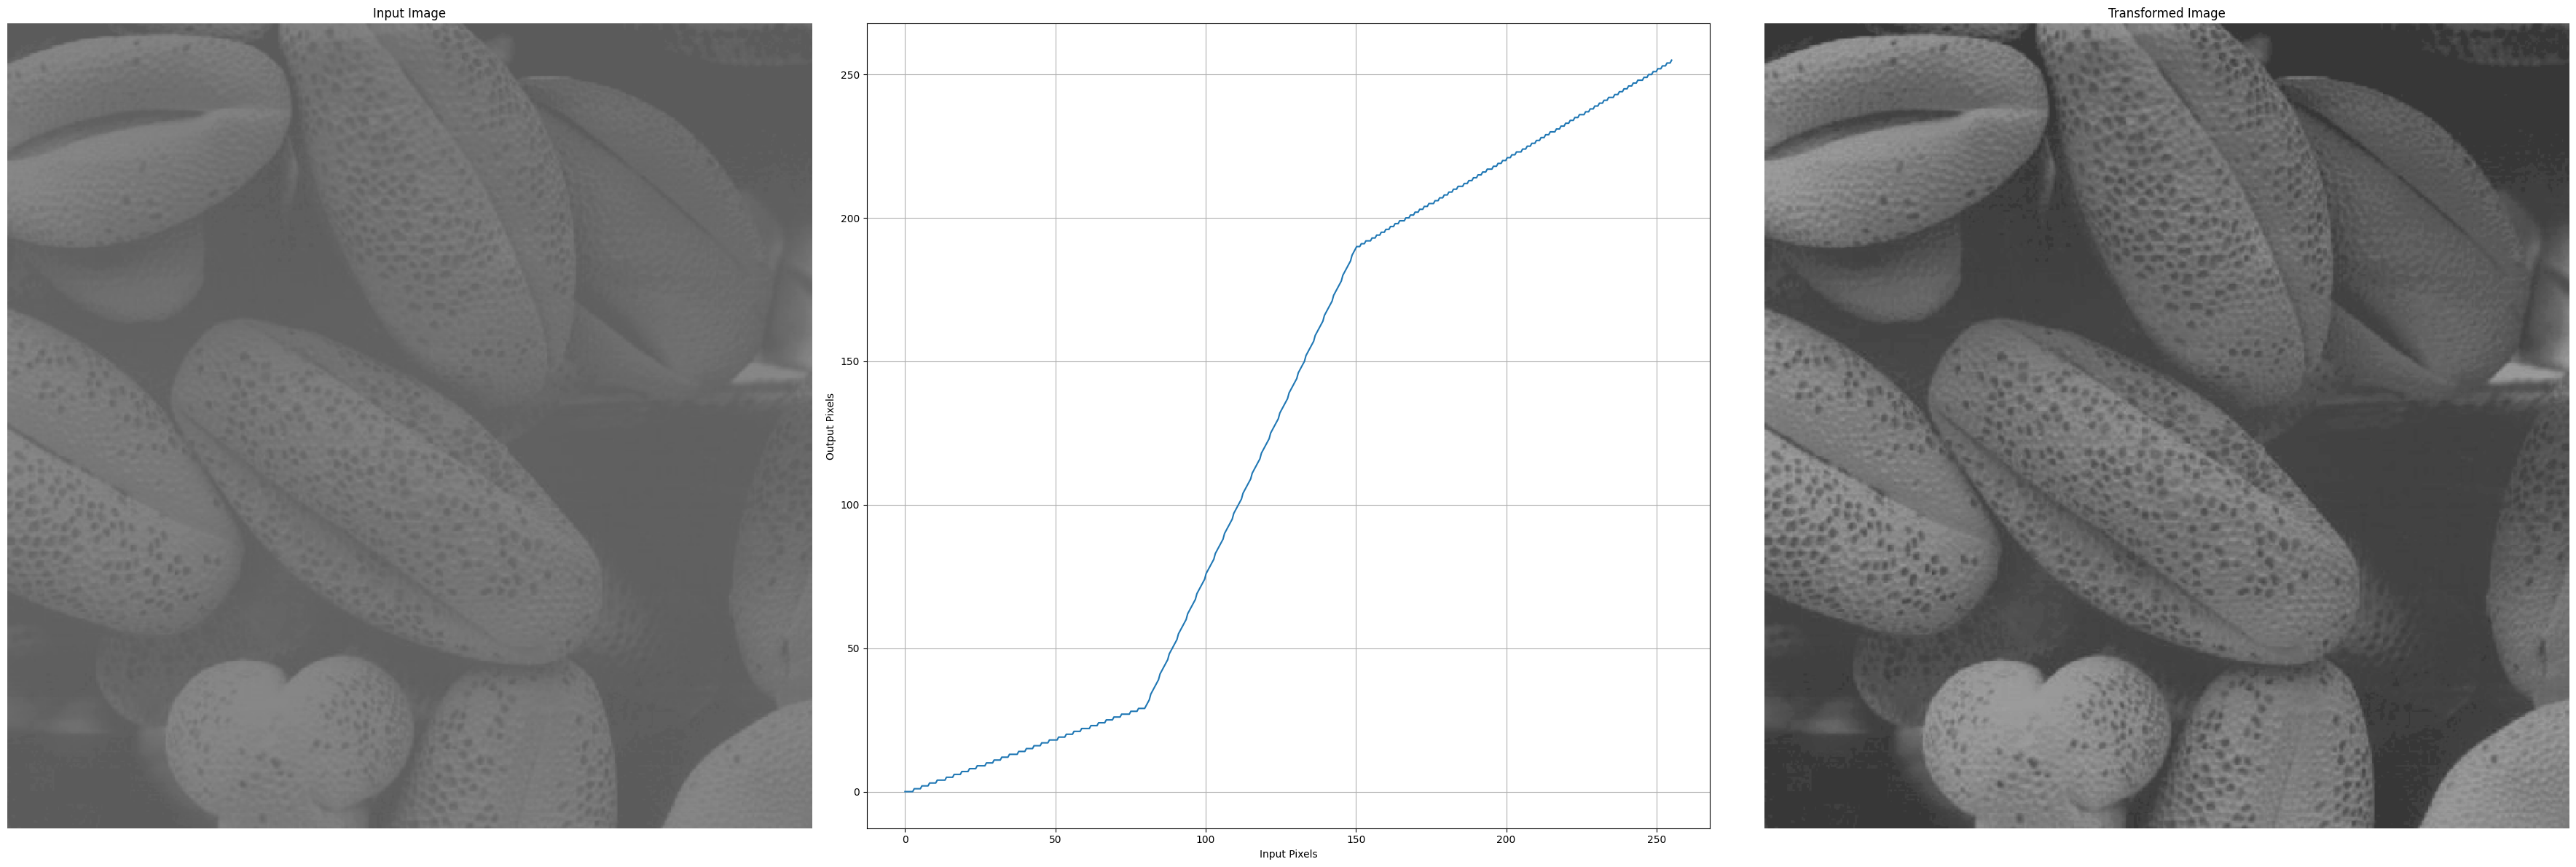

In [ ]:
plot_results(im, transformed_im, x_values, y_values, 'piecewise1')

- Using different values for (r1, s1) , (r2, s2)

In [ ]:
m = np.mean(im)

transformed_im2 = piecewiseLinearVec(im, m, 0, m, 255)

In [ ]:
x_values = np.linspace(0,255,500)
y_values = piecewiseLinearVec(x_values, m, 0, m, 255)

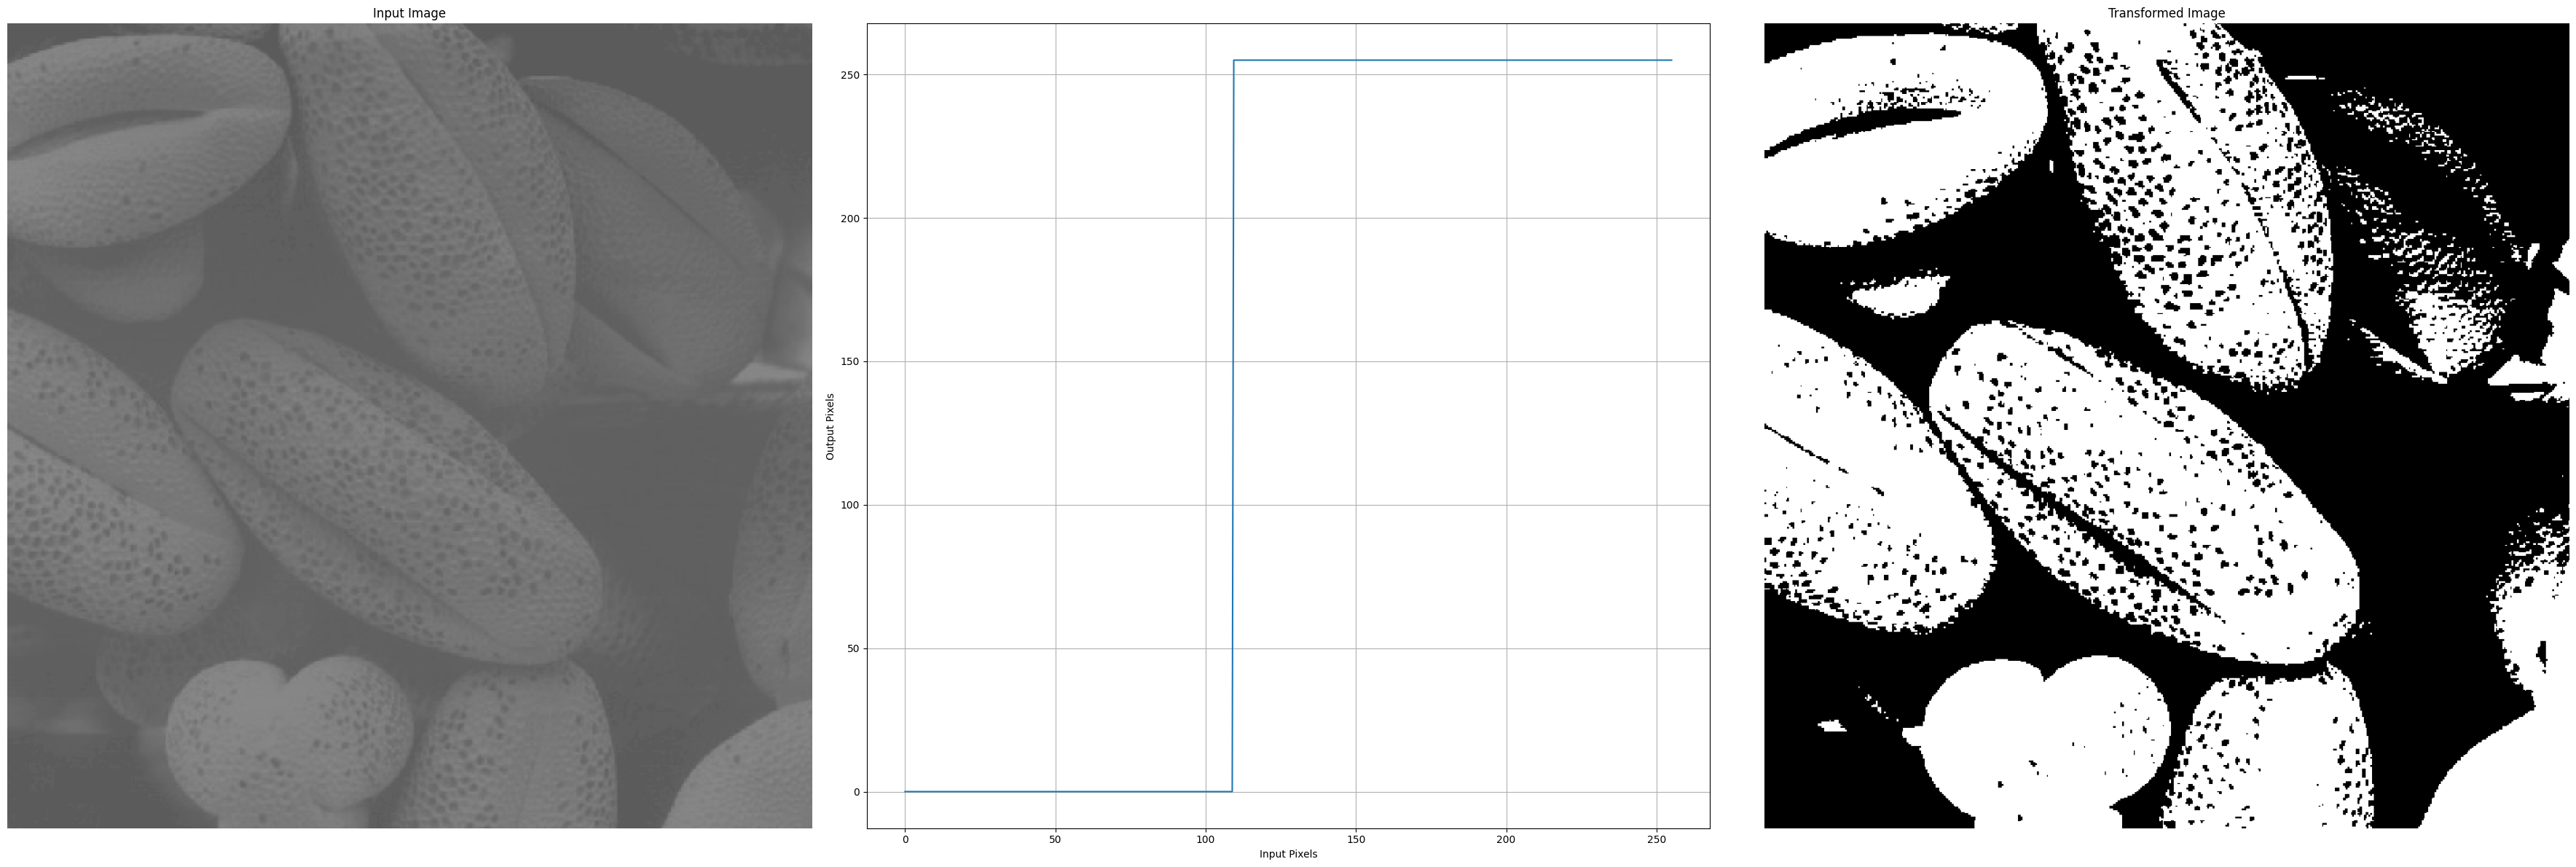

In [ ]:
plot_results(im, transformed_im2, x_values, y_values, 'piecewise2')

## - Intensity Level Slicing

In [ ]:
kidney_img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0312(a)(kidney).tif')

(-0.5, 719.5, 827.5, -0.5)

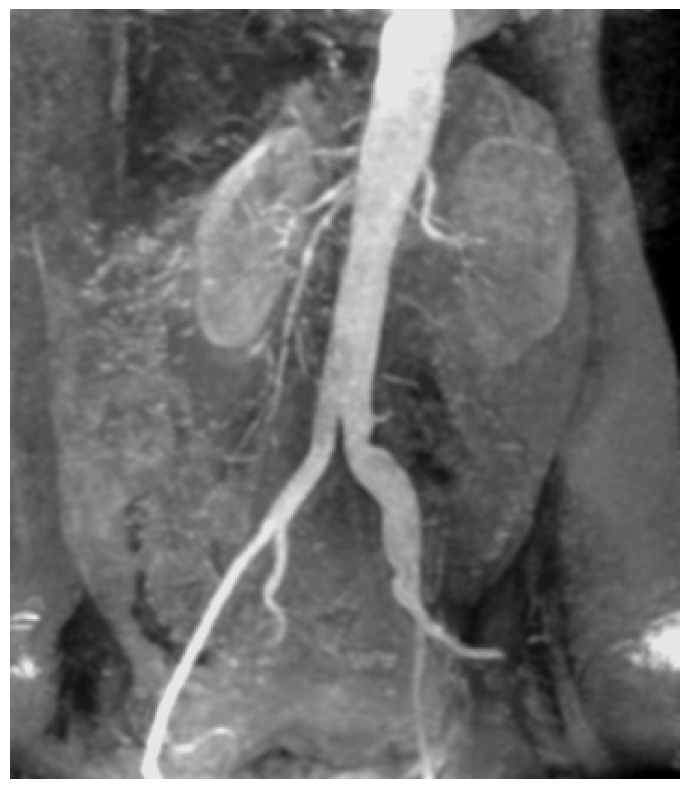

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(kidney_img)
plt.axis('off')

In [ ]:
def intensityLevelTransform1(r):
    if r > 140 and r < 210:
        return 255
    else:
        return 0

In [ ]:
intensityLevelTransform1vec = np.vectorize(intensityLevelTransform1)

In [ ]:
transform1 = intensityLevelTransform1vec(kidney_img)

In [ ]:
x_values = np.linspace(0,255,500)
y_values = intensityLevelTransform1vec(x_values)

In [ ]:
plot_results(kidney_img, transform1, x_values, y_values, 'intensity_level1')

In [ ]:
def intensityLevelTransform2(r):
    if r > 140 and r < 210:
        return 240
    else:
        return r

In [ ]:
intensityLevelTransform2vec = np.vectorize(intensityLevelTransform2)

In [ ]:
transform2 = intensityLevelTransform2vec(kidney_img)

In [ ]:
x_values = np.linspace(0,255,500)
y_values = intensityLevelTransform2vec(x_values)

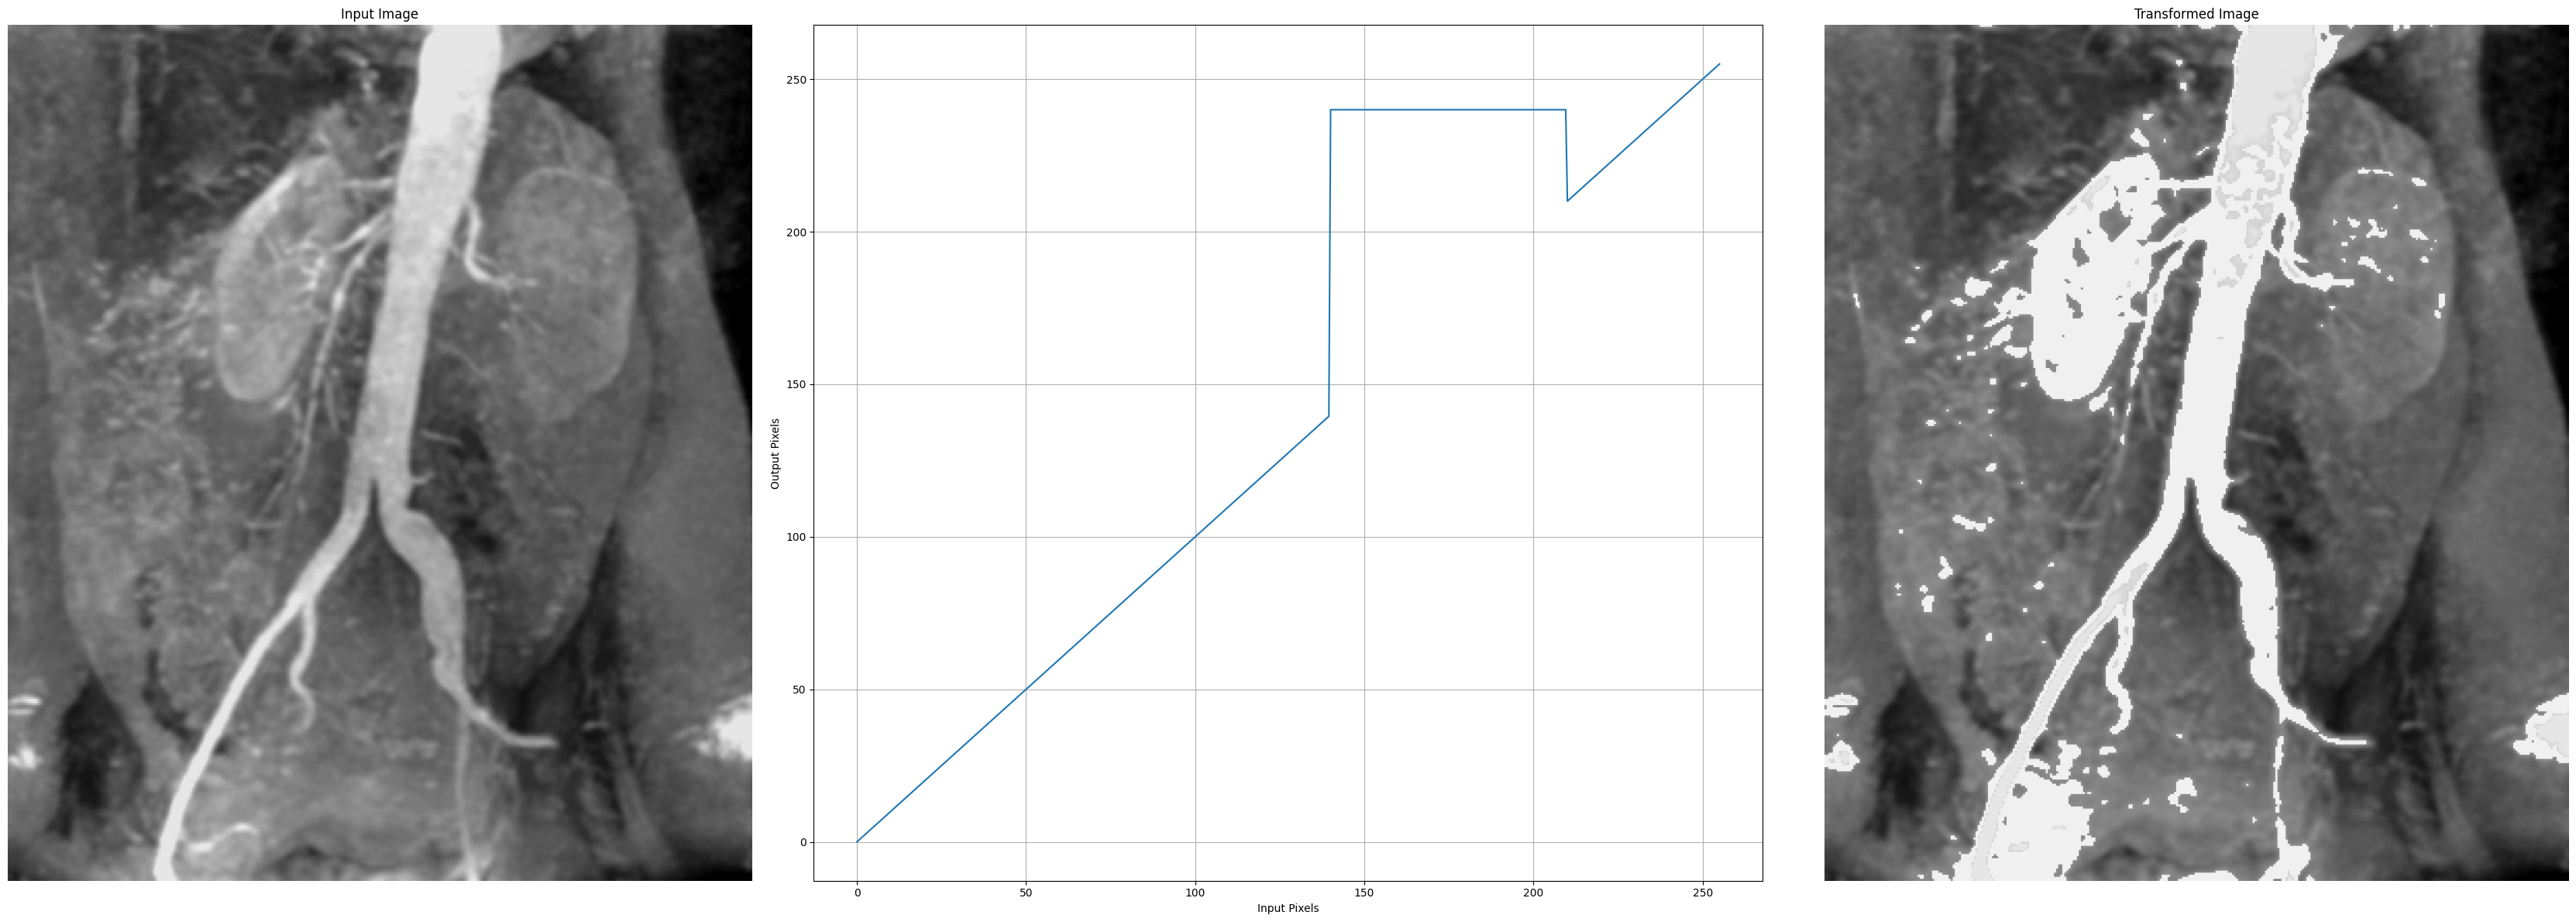

In [ ]:
plot_results(kidney_img, transform2, x_values, y_values, 'intensity_level2')

## - Bit Plane Slicing

In [ ]:
dollar_img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0314(a)(100-dollars).tif',0)


(-0.5, 1191.5, 499.5, -0.5)

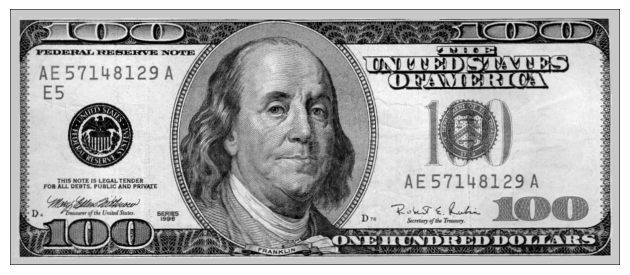

In [ ]:
plt.imshow(dollar_img, cmap="gray")
plt.axis('off')

In [ ]:
def bitPlaneSlicing(r, bit_plane):
    dec = np.binary_repr(r, width = 8)
    return int(dec[8-bit_plane])

In [ ]:
bitPlaneSlicingVec = np.vectorize(bitPlaneSlicing)

In [ ]:
eight_bitplace = bitPlaneSlicingVec(dollar_img, bit_plane = 8)

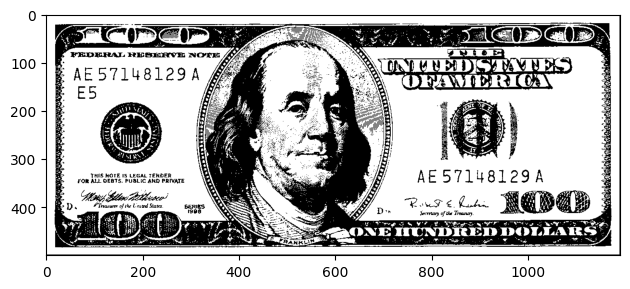

In [ ]:
plt.imshow(eight_bitplace, cmap="gray")

In [ ]:
bit_planes_dict = {}
for bit_plane in np.arange(8,0, -1):
    bit_planes_dict['bit_plane_' + str(bit_plane)] = bitPlaneSlicingVec(dollar_img, bit_plane = bit_plane)

In [ ]:
plt.figure(figsize = (24,12))

plt.subplot(331)
plt.imshow(dollar_img, cmap="gray")
plt.title('Original Image')
plt.axis('off')

plt.subplot(332)
plt.imshow(bit_planes_dict['bit_plane_8'], cmap="gray")
plt.title('bit_plane_8')
plt.axis('off')

plt.subplot(333)
plt.imshow(bit_planes_dict['bit_plane_7'], cmap="gray")
plt.title('bit_plane_7')
plt.axis('off')

plt.subplot(334)
plt.imshow(bit_planes_dict['bit_plane_6'], cmap="gray")
plt.title('bit_plane_6')
plt.axis('off')

plt.subplot(335)
plt.imshow(bit_planes_dict['bit_plane_5'], cmap="gray")
plt.title('bit_plane_5')
plt.axis('off')

plt.subplot(336)
plt.imshow(bit_planes_dict['bit_plane_4'], cmap="gray")
plt.title('bit_plane_4')
plt.axis('off')

plt.subplot(337)
plt.imshow(bit_planes_dict['bit_plane_3'], cmap="gray")
plt.title('bit_plane_3')
plt.axis('off')

plt.subplot(338)
plt.imshow(bit_planes_dict['bit_plane_2'], cmap="gray")
plt.title('bit_plane_2')
plt.axis('off')

plt.subplot(339)
plt.imshow(bit_planes_dict['bit_plane_1'], cmap="gray")
plt.title('bit_plane_1')
plt.axis('off')

plt.tight_layout()
plt.savefig('bit_plane_slicing.png')

Output hidden; open in https://colab.research.google.com to view.